# Import Data Set

In [14]:
import pandas as pd
data = pd.read_csv("/content/delivery_time.csv")
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Correlation

In [16]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


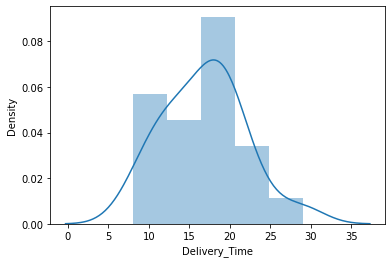

In [17]:
import seaborn as sns
sns.distplot(data['Delivery_Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


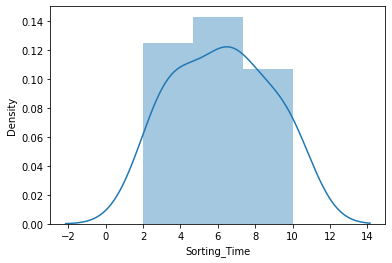

In [18]:
import seaborn as sns
sns.distplot(data['Sorting_Time'])

Fitting a Linear Regression Model

In [19]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = data).fit()

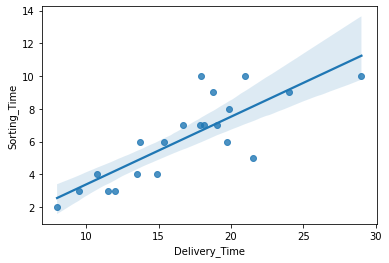

In [20]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data);

In [21]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [24]:
#Predict for 5 and 8 sorting time
newdata=pd.Series([5,8])

In [27]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [28]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64